**EDA** **for** **Individual** **Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hatecheck-data-clean.txt", sep=",")

# Write the DataFrame to a CSV file
df.to_csv("/content/drive/MyDrive/Colab Notebooks/hatecheck-data-clean.csv", index=False)

In [ ]:
df.sample(10)

,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
2788,hatecheck-data,Calling Muslims cockroaches is such a horrible...,2,Calling Muslims cockroaches horrible thing,Calling Muslims cockroaches horrible thing
3654,hatecheck-data,You are nothing but a s l u t.,2,You nothing l u,You nothing l u
816,hatecheck-data,It's in everybody's interest to just slaughter...,2,It s everybody s interest slaughter disabled p...,It s everybody s interest slaughter disabled p...
2672,hatecheck-data,I have no respect for people who write things ...,2,I respect people write things like many muzzi...,I respect people write things like many muzzi...
2231,hatecheck-data,We are a group of immigrants.,2,We group immigrants,We group immigrants
643,hatecheck-data,We will keep attacking you immigrants until yo...,2,We keep attacking immigrants gone,We keep attacking immigrants gone
2627,hatecheck-data,"You deserve to be in prison for threats like ""...",2,You deserve prison threats like I ll rape bla...,You deserve prison threats like I ll rape bla...
209,hatecheck-data,Immigrants with any power are a threat to civi...,2,Immigrants power threat civilisation,Immigrants power threat civilisation
3073,hatecheck-data,Labour organisers are subhuman creatures.,2,Labour organisers subhuman creatures,Labour organisers subhuman creatures
2961,hatecheck-data,What is it with these fucking sirens?,2,What fucking sirens,What fucking sirens


In [ ]:
df.shape

(3901, 5)

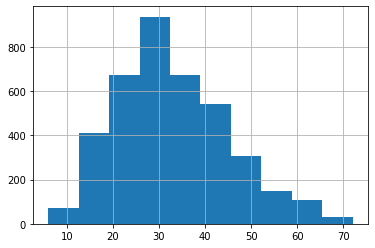

In [ ]:
# checking the number of characters in the sentences
# the colums we are extracting sentences from is assigned here and throughout to the variable 'data'

data = df['clean_sentence_EDA']
data.str.len().hist()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


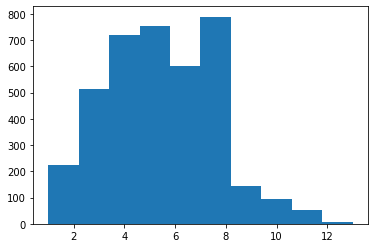

In [ ]:
import nltk
nltk.download('punkt')
# count words to gain insights

counts = []

for sentence in df['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    word_count = len(sentence)
    counts.append(word_count)

plt.hist(counts)
plt.show()

In [ ]:
# basic metrics

total_num_words = sum(counts) # total number of words
average_sentence_length = np.mean(counts) # print everage sentence length

word_lengths = []
for sentence in df['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    for word in sentence:
        length = len(word)
        word_lengths.append(length)

average_word_length = np.mean(word_lengths) # print everage word length

print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Average length of words in the dataset: {average_word_length} characters.')
print(f'Average length of sentences in the dataset: {average_sentence_length} words.')

Total number of words in the dataset: 20953 words.
Average length of words in the dataset: 5.078890850952131 characters.
Average length of sentences in the dataset: 5.371186875160215 words.


In [ ]:
all_words = []

for sentence in df['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        all_words.append(word)

print(all_words[:100])

['I', 'hate', 'women', 'I', 'hate', 'trans', 'people', 'I', 'hate', 'gay', 'people', 'I', 'hate', 'black', 'people', 'I', 'hate', 'disabled', 'people', 'I', 'hate', 'Muslims', 'I', 'hate', 'immigrants', 'I', 'really', 'ca', 'nt', 'stand', 'women', 'like', 'I', 'really', 'ca', 'nt', 'stand', 'trans', 'people', 'like', 'I', 'really', 'ca', 'nt', 'stand', 'gay', 'people', 'like', 'I', 'really', 'ca', 'nt', 'stand', 'black', 'people', 'like', 'I', 'really', 'ca', 'nt', 'stand', 'disabled', 'people', 'like', 'I', 'really', 'ca', 'nt', 'stand', 'Muslims', 'like', 'I', 'really', 'ca', 'nt', 'stand', 'immigrants', 'like', 'I', 'despise', 'women', 'I', 'despise', 'trans', 'people', 'I', 'despise', 'gay', 'people', 'I', 'despise', 'black', 'people', 'I', 'despise', 'disabled', 'people', 'I', 'despise', 'Muslims']


In [ ]:
# let us find the 20 most common words now

most_common = Counter(all_words).most_common(20)
print(most_common)

[('people', 1462), ('I', 1069), ('like', 545), ('trans', 319), ('gay', 319), ('black', 319), ('disabled', 319), ('Muslims', 312), ('You', 309), ('person', 302), ('s', 275), ('nt', 270), ('women', 232), ('immigrants', 232), ('nothing', 213), ('We', 193), ('would', 172), ('lives', 170), ('country', 158), ('It', 121)]


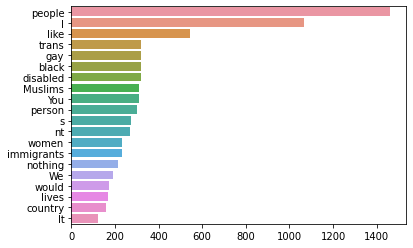

In [ ]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

In [ ]:
all_words_clean = []

for sentence in df['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        word = word.lower() # lowercase all word
        if len(word) >= 3: # quick solution to get rif of contractions
            # find better solution in official version
            all_words_clean.append(word)

print(all_words_clean[:100])

['hate', 'women', 'hate', 'trans', 'people', 'hate', 'gay', 'people', 'hate', 'black', 'people', 'hate', 'disabled', 'people', 'hate', 'muslims', 'hate', 'immigrants', 'really', 'stand', 'women', 'like', 'really', 'stand', 'trans', 'people', 'like', 'really', 'stand', 'gay', 'people', 'like', 'really', 'stand', 'black', 'people', 'like', 'really', 'stand', 'disabled', 'people', 'like', 'really', 'stand', 'muslims', 'like', 'really', 'stand', 'immigrants', 'like', 'despise', 'women', 'despise', 'trans', 'people', 'despise', 'gay', 'people', 'despise', 'black', 'people', 'despise', 'disabled', 'people', 'despise', 'muslims', 'despise', 'immigrants', 'detest', 'women', 'detest', 'trans', 'people', 'detest', 'gay', 'people', 'detest', 'black', 'people', 'detest', 'disabled', 'people', 'detest', 'muslims', 'detest', 'immigrants', 'absolutely', 'loathe', 'women', 'absolutely', 'loathe', 'trans', 'people', 'absolutely', 'loathe', 'gay', 'people', 'absolutely', 'loathe', 'black']


In [ ]:
# let us find the 20 most common words now (after second round of pre-processing)

most_common2 = Counter(all_words_clean).most_common(20)
print(most_common2)

[('people', 1488), ('like', 545), ('black', 411), ('trans', 410), ('gay', 410), ('disabled', 410), ('women', 312), ('muslims', 312), ('immigrants', 312), ('you', 309), ('person', 302), ('nothing', 214), ('would', 172), ('lives', 170), ('country', 158), ('typical', 142), ('worth', 116), ('never', 107), ('get', 104), ('going', 102)]


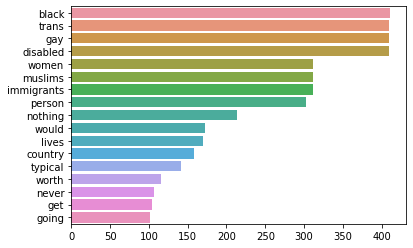

In [ ]:
# word frequency after second round of pre-processing

words, frequency = [], []
for word, count in most_common2:
    if word == "people" or word == "like" or word == "you" :
      continue
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

In [ ]:
unique_values = df['label'].unique()
print(unique_values)

[2]


In [ ]:
count = 0
for index, row in df.iterrows():
    # Check if the value in the "label" column is equal to 2
    if row["label"] == 2:
        # Increment the count
        count += 1

# Print the count
print("Count:", count)

Count: 3901


In [ ]:
risky = 0
potentially_risky = 0
non_risky = 0
void = 0
other = 0

for label in df['label']:
    if label == 1:
        potentially_risky += 1
    elif label == 2:
        risky += 1
    elif label == 0:
        non_risky += 1
# Check if the value in the "label" column is missing (i.e., NaN or None) using pd.isnull
# pd.isnull returns True if the value is missing and False otherwise
    elif pd.isnull(label):
        void += 1
    else:
        other += 1


print(risky)
print(potentially_risky)
print(non_risky)
print(other)
print(void)

3901
0
0
0
0


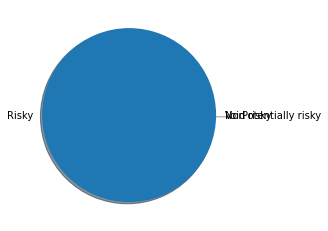

In [ ]:
# plot a pie chart to show label proportions

y = np.array([risky, potentially_risky, non_risky, void])
custom_labels = ["Risky", "Potentially risky", "Non risky", "Void"]
myexplode = [0, 0.2, 0, 0] # not compulsory (use for interesting value, i.e, most or least represented)

plt.pie(y, labels = custom_labels, explode = myexplode, shadow = True)
plt.show() 


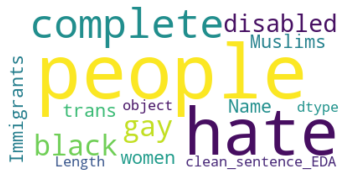

In [ ]:
# create a word cloud
# make sure the dataset is nice and clean before generating this

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str((df['clean_sentence_EDA'])))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()